In [1]:
import pandas as pd
import plotly.express as px

In [14]:
from sklearn.cluster import KMeans

In [3]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.3 MB/s eta 0:00:0000:0100:01m

[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
excel_file_path = "/workspaces/dev/K_Means_Clustering/cust_data.xlsx"
cust_data = pd.read_excel(excel_file_path,sheet_name="in")

In [7]:
cust_data.shape

(30000, 38)

In [8]:
cust_data.describe()

,Cust_ID,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,Vans,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,4.169800,0.267433,0.252333,0.222933,0.161333,0.143533,0.139767,0.106933,0.111433,...,0.102533,0.271133,0.370067,0.158967,0.077667,0.057333,0.192200,0.116367,0.088033,0.070900
std,8660.398374,3.590311,0.804778,0.705368,0.917494,0.740038,0.641258,0.525840,0.515921,0.547990,...,0.486376,0.714682,0.758465,0.510527,0.383370,0.300082,0.641306,0.446578,0.399277,0.387915
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15000.500000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,22500.250000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30000.000000,12.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.000000,9.000000,16.000000,...,19.000000,12.000000,11.000000,8.000000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


<Axes: xlabel='Gender'>

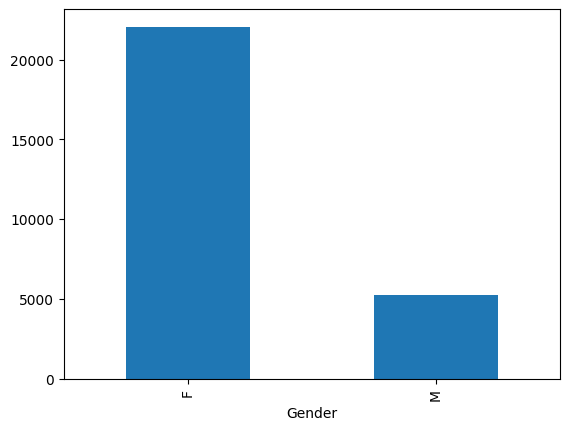

In [9]:
cust_data["Gender"].value_counts().plot(kind='bar')

In [11]:
# Convert the Categorical column - Gender - into numeric values
gender_dict = {'M':1,'F':2}
cust_data["Gender"] = cust_data["Gender"].map(gender_dict)
cust_data["Gender"] = cust_data["Gender"].fillna(0)
cust_data["Gender"] = cust_data["Gender"].astype(int)

In [13]:
# Correlation Matrix 
corr_matrix = cust_data.corr()
fig = px.imshow(corr_matrix,
                x=corr_matrix.index,
                y=corr_matrix.columns,
                color_continuous_scale='RdBu',
                title='Correlation Heatmap')
fig.update_layout(width=1200, height=1000) 

fig.show()

Brands with approximate correlation of 50%
 - Siemens & Asics
 - Forever 21 & Hollister
 - Pladis & Burberry
 - Compaq & Juniper
 - Pladis & Diary Queen are correlated 

In [18]:
cust_data.head(10)

,Cust_ID,Gender,Orders,Jordan,Gatorade,Samsung,Asus,Udis,Mondelez International,Wrangler,...,LG,Dior,Scabal,Tommy Hilfiger,Hollister,Forever 21,Colavita,Microsoft,Jiffy mix,Kraft
0,1,1,7,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,3,1,7,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,10,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,6,2,4,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,7,2,6,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,8,1,9,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,2,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,2,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
